In [1]:
%load_ext autoreload
%autoreload 2

import warnings
# For ignoring warnings printed by R magic commands
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

In [2]:
%%R
# Load R libraries
require(stringr)
require(ggplot2)
require(data.table)
require(Hmisc)
require(ggthemes)
require(gridExtra)
require(grid)
require(lattice)
require(scales)
require(RColorBrewer)
library(tidyverse)
library(glue)
library(dplyr)

# Install the ggthemes package (you have to do it only once)
install.packages("ggthemes", repos = "http://cran.us.r-project.org")
install.packages("plotrix", repos = "http://cran.us.r-project.org")
install.packages("wesanderson")
devtools::install_github("karthik/wesanderson")
library(ggthemes)
library(plotrix)
library(wesanderson)
library(gridExtra)

R[write to console]: Loading required package: stringr

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: data.table

R[write to console]: Loading required package: Hmisc

R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: Formula

R[write to console]: 
Attaching package: ‘Hmisc’


R[write to console]: The following objects are masked from ‘package:base’:

    format.pval, units


R[write to console]: Loading required package: ggthemes

R[write to console]: Loading required package: gridExtra

R[write to console]: Loading required package: grid

R[write to console]: Loading required package: scales

R[write to console]: Loading required package: RColorBrewer

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ tibble  3.0.0     ✔ purrr   0.3.3
✔ tidyr   


Error in contrib.url(repos, type) : 
  trying to use CRAN without setting a mirror
Calls: <Anonymous> ... withVisible -> install.packages -> startsWith -> contrib.url


In [3]:
import os
import random

import pandas as pd

In [41]:
# map numbers to digits
# [48, 64, 128, 256, 512, 1024, 512, 256] -> [1, 2, 3, 4, 5, 6, 5, 4]

bottleneck_data = {
    "name": ["CNN", "CNN", "CNN", "CNN", "CNN", "CNN", "MLP", "MLP"],
    "bottleneck_dims": [1, 2, 3, 4, 5, 6, 5, 4],
    "accuracy": [92.41, 92.34, 92.37, 92.35, 92.37, 92.41, 91.59, 91.57]
}

bottleneck_df = pd.DataFrame(bottleneck_data)
bottleneck_df

,name,bottleneck_dims,accuracy
0,CNN,1,92.41
1,CNN,2,92.34
2,CNN,3,92.37
3,CNN,4,92.35
4,CNN,5,92.37
5,CNN,6,92.41
6,MLP,5,91.59
7,MLP,4,91.57


In [59]:
%%R
create_line_plot <- function(
    data_df, 
    line_size=1,
    point_size=2,
    x_label="Bottleneck Dims", 
    y_label="Accuracy %",
    y_title=element_blank(),
    x_breaks=c(1, 2, 3, 4, 5, 6),
    y_breaks,
    y_limits,
    legend_position="none"
    ) {

    blues = brewer.pal(n = 9, "Blues")[5:9]
    reds = brewer.pal(n = 9, "Reds")[4:8]

    color_palette <- c(reds[4], reds[1], blues[3])
    new_legend_labels <- c("CNN", "MLP")

    # Reorder 'name' column to order netbeacon -> leo -> cap
    data_df$name <- factor(data_df$name, levels = c("CNN", "MLP"))

    # map the x values back to the original numbers
    x_labels <- c("48", "64", "128", "256", "512", "1024")

    data_plot <- ggplot(data_df, aes(x=bottleneck_dims, y=accuracy, color=name)) +
                        geom_line(size=line_size) +
                        geom_point(size=point_size) +
                        labs(x = x_label, y = y_label) +
                        scale_x_continuous(breaks=x_breaks, labels = x_labels) + #, labels = label_number_si()) +
                        scale_y_continuous(breaks=y_breaks, labels = scales::number_format(accuracy = 1)) +
                        coord_cartesian(ylim = y_limits) +
                        theme_hc(base_size = 22) +
                        theme(axis.ticks = element_line(color = "black"), # Ensure ticks are visible
                              axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
                              plot.title = element_text(hjust = 0.5),
                              axis.text.x=element_text(colour="black", size=16),
                              axis.text.y=element_text(colour="black", size=16),
                              axis.title.x=element_text(colour="black", size=18),
                              axis.title.y=y_title,
                              legend.text=element_text(size=16)) +
                        guides(fill=guide_legend(ncol=1, bycol=TRUE, title=NULL), linetype=FALSE) +
                        theme(plot.margin = margin(0.6, 0.25, 0.1, 0.25, "cm"),
                              legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
                              legend.key.width = unit(0.4, "lines"),
                              legend.key.height = unit(0.4, "lines"),
                              legend.spacing.x = unit(0.05, "cm"),
                              legend.spacing.y = unit(0.05, "cm"),
                              legend.title = element_blank(), 
                              legend.position = legend_position, 
                              legend.justification = c(0, 1)) +
                        scale_color_manual(values = color_palette, labels = new_legend_labels)
                                
    return (data_plot)
}

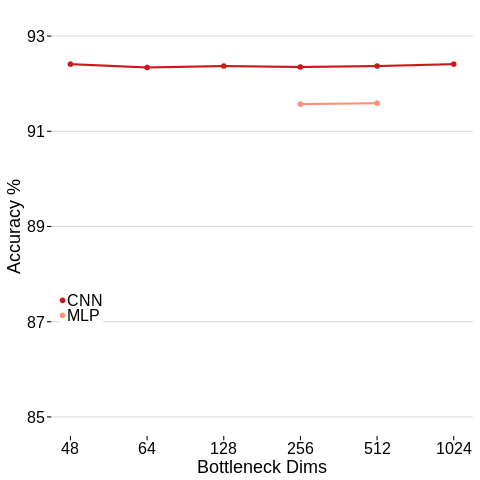

In [60]:
%%R -i bottleneck_df
bottleneck_df_plot <- create_line_plot(
    data_df=bottleneck_df,
    y_title=element_text(colour="black", size=18), 
    y_breaks=seq(from=85, to=93, length.out=5),
    y_limits=c(85, 93),
    legend_position=c(0.02, 0.32)
)
bottleneck_df_plot

In [61]:
%%R
# save the ggplot with a tight layout around all the components
ggsave(
    bottleneck_df_plot, 
    width=5.0, height=2.0, # 18.0, 2.5
    file="/home/jovyan/work/output/bottleneck.pdf"
)